In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

data_dir = "2D-Range-Doppler Images"

input_shape = (900, 23, 1)  
batch_size = 30

def preprocess_image(image):
    return image / 255.0

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2,
    preprocessing_function=preprocess_image  
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    color_mode='grayscale'  
)

valid_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    color_mode='grayscale' 
)

cnn_model = models.Sequential([
    layers.Input(shape=input_shape, name='input'),
    layers.Conv2D(64, (5, 2), padding='same', name='conv_1'),
    layers.BatchNormalization(name='BN_1'),
    layers.ReLU(name='relu_1'),
    layers.MaxPooling2D(2, strides=2, name='maxp_1'),
    
    layers.Conv2D(128, (5, 2), padding='same', name='conv_2'),
    layers.BatchNormalization(name='BN_2'),
    layers.ReLU(name='relu_2'),
    layers.MaxPooling2D(2, strides=2, name='maxp_2'),
   
    layers.Conv2D(256, (5, 2), padding='same', name='conv_3'),
    layers.BatchNormalization(name='BN_3'),
    layers.ReLU(name='relu_3'),
    layers.MaxPooling2D(2, strides=2, name='maxp_3'),

    layers.Conv2D(512, (5, 2), padding='same', name='conv_4'),
    layers.BatchNormalization(name='BN_4'),
    layers.ReLU(name='relu_4'),
    layers.MaxPooling2D(2, strides=2, name='maxp_4'),

    layers.Flatten(),
    layers.Dense(512, name='fc_1'),
    layers.ReLU(name='relu_5'),
])

num_lstm_features = 512  
lstm_model = models.Sequential([
    layers.Input(shape=(None, num_lstm_features), name='cnn_features'),
    layers.LSTM(128, return_sequences=True, name='lstm_1'),
    layers.LSTM(64, name='lstm_2'),
    layers.Dense(10, activation='softmax', name='output')  
])

combined_model = models.Sequential([
    cnn_model,
    layers.Reshape((-1, num_lstm_features)),
    lstm_model,
])

combined_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

history = combined_model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=30,
    verbose=2
)
combined_model.save("CNNRP.h5")

Found 1440 images belonging to 10 classes.
Found 360 images belonging to 10 classes.
Epoch 1/30
48/48 - 119s - loss: 2.3003 - accuracy: 0.1063 - val_loss: 2.3036 - val_accuracy: 0.1000 - 119s/epoch - 2s/step
Epoch 2/30
48/48 - 104s - loss: 2.2409 - accuracy: 0.2292 - val_loss: 2.3082 - val_accuracy: 0.1000 - 104s/epoch - 2s/step
Epoch 3/30
48/48 - 106s - loss: 2.1040 - accuracy: 0.4229 - val_loss: 2.3346 - val_accuracy: 0.1000 - 106s/epoch - 2s/step
Epoch 4/30
48/48 - 104s - loss: 1.8568 - accuracy: 0.6257 - val_loss: 2.4055 - val_accuracy: 0.1333 - 104s/epoch - 2s/step
Epoch 5/30
48/48 - 103s - loss: 1.5599 - accuracy: 0.8000 - val_loss: 2.4502 - val_accuracy: 0.1000 - 103s/epoch - 2s/step
Epoch 6/30
48/48 - 142s - loss: 1.2267 - accuracy: 0.9021 - val_loss: 2.5719 - val_accuracy: 0.1083 - 142s/epoch - 3s/step
Epoch 7/30
48/48 - 168s - loss: 0.9048 - accuracy: 0.9486 - val_loss: 2.6121 - val_accuracy: 0.1000 - 168s/epoch - 4s/step
Epoch 8/30
48/48 - 168s - loss: 0.6117 - accuracy: 0.9

e:\airwriting\Dataset\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


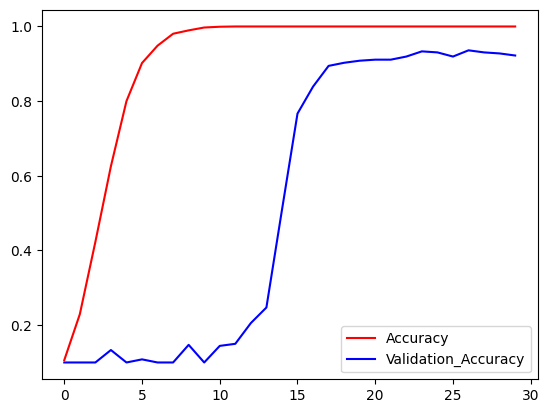

In [3]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label = 'Accuracy')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'Validation_Accuracy')
plt.legend()
plt.show()

In [5]:
print(history.history['accuracy'])
print(history.history['val_accuracy'])

[0.10625000298023224, 0.2291666716337204, 0.4229166805744171, 0.6256944537162781, 0.800000011920929, 0.9020833373069763, 0.9486111402511597, 0.980555534362793, 0.9895833134651184, 0.9972222447395325, 0.9993055462837219, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13333334028720856, 0.10000000149011612, 0.10833333432674408, 0.10000000149011612, 0.10000000149011612, 0.14722222089767456, 0.10000000149011612, 0.14444445073604584, 0.15000000596046448, 0.20555555820465088, 0.24722221493721008, 0.5083333253860474, 0.7666666507720947, 0.8388888835906982, 0.894444465637207, 0.9027777910232544, 0.9083333611488342, 0.9111111164093018, 0.9111111164093018, 0.9194444417953491, 0.9333333373069763, 0.9305555820465088, 0.9194444417953491, 0.9361110925674438, 0.9305555820465088, 0.9277777671813965, 0.9222221970558167]


In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model("CNNRP.h5")

new_image_path = '2D-Range-Doppler Images\Digit_6\Digit_6_124.png'

def preprocess_new_image(image_path):
    img = image.load_img(image_path, target_size=(900, 23), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    preprocessed_img = img_array / 255.0  
    return preprocessed_img

new_image = preprocess_new_image(new_image_path)
predictions = model.predict(new_image)

predicted_class = np.argmax(predictions)

print("Predicted Class Label:", predicted_class)


1/1 [==============================] - 1s 1s/step
Predicted Class Label: 6


In [5]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import os
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model("CNNRP.h5")

test_dir = "test_images"

true_labels = []
predicted_labels = []

for filename in os.listdir(test_dir):
    if filename.endswith(".png"):
        true_label = int(filename.split("_")[1])
        true_labels.append(true_label)
        
        img = image.load_img(os.path.join(test_dir, filename), target_size=(900, 23), color_mode='grayscale')
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) 
        preprocessed_img = img_array / 255.0  
        
        prediction = model.predict(preprocessed_img)
        predicted_label = np.argmax(prediction)
        predicted_labels.append(predicted_label)

accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

confusion = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion)


1/1 [==============================] - 0s 40ms/step
Accuracy: 100.00%
Confusion Matrix:
[[4 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 4]]


In [1]:
from keras.models import load_model

model = load_model('CNNRP.h5')
model.save_weights('CNNRP_weights.h5')
